Check Python version

In [1]:
!python --version

Python 3.9.12


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [3]:
# Local directory
data_dir = "../datasets/finance"
file_name = "Returns_short_interest_data_train"
file_path = f"{data_dir}/{file_name}.csv"

# Through online GitHub
# file_path = "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv"

In [4]:
train_df = pd.read_csv(file_path)

In [5]:
train_df.shape

(788, 15)

In [6]:
train_df.columns

Index(['date', 'log_dp', 'log_dy', 'log_ep', 'log_de', 'bm', 'ntis', 'tbl',
       'lty', 'ltr', 'tml', 'dfy', 'dfr', 'infl_lag', 'target'],
      dtype='object')

In [7]:
train_df.head()

,date,log_dp,log_dy,log_ep,log_de,bm,ntis,tbl,lty,ltr,tml,dfy,dfr,infl_lag,target
0,1937-05-01,-2.999429,-2.999429,-2.648946,-0.350483,0.489382,0.028278,0.0041,0.0282,0.0053,0.0241,0.0151,-0.0013,-2.999429,-0.006041
1,1937-06-01,-2.908721,-2.908721,-2.577364,-0.331357,0.504961,0.031266,0.0036,0.0285,-0.0018,0.0249,0.0165,0.0071,-2.908721,-0.054103
2,1937-07-01,-3.034560,-3.034560,-2.660885,-0.373675,0.464649,0.027225,0.0028,0.0277,0.0138,0.0249,0.0166,-0.0099,-3.034560,0.098758
3,1937-08-01,-3.006598,-3.006598,-2.589993,-0.416605,0.481935,0.031064,0.0029,0.0286,-0.0104,0.0257,0.0168,0.0087,-3.006598,-0.051425
4,1937-09-01,-2.883131,-2.883131,-2.422915,-0.460216,0.553147,0.035847,0.0031,0.0284,0.0045,0.0253,0.0188,-0.0020,-2.883131,-0.139868


In [8]:
train_df.tail()

,date,log_dp,log_dy,log_ep,log_de,bm,ntis,tbl,lty,ltr,tml,dfy,dfr,infl_lag,target
783,2002-08-01,-4.054990,-4.054990,-3.454868,-0.600122,0.284412,0.025483,0.0162,0.0510,0.0464,0.0348,0.0121,-0.0012,-4.054990,0.005711
784,2002-09-01,-3.943471,-3.943471,-3.301014,-0.642457,0.324555,0.029393,0.0163,0.0480,0.0417,0.0317,0.0125,-0.0087,-3.943471,-0.110377
785,2002-10-01,-4.020567,-4.020567,-3.411479,-0.609089,0.293437,0.025778,0.0158,0.0508,-0.0294,0.0350,0.0141,0.0054,-4.020567,0.087282
786,2002-11-01,-4.070296,-4.070296,-3.495323,-0.574973,0.276975,0.023009,0.0123,0.0521,-0.0122,0.0398,0.0131,0.0252,-4.070296,0.057994
787,2002-12-01,-4.002328,-4.002328,-3.462264,-0.540064,0.295386,0.025838,0.0119,0.0484,0.0507,0.0365,0.0124,-0.0146,-4.002328,-0.059826


Change 'target' to float

In [9]:
# train_df["target"] = train_df["target"].astype(float)

In [10]:
# train_df.head()

Plot graph

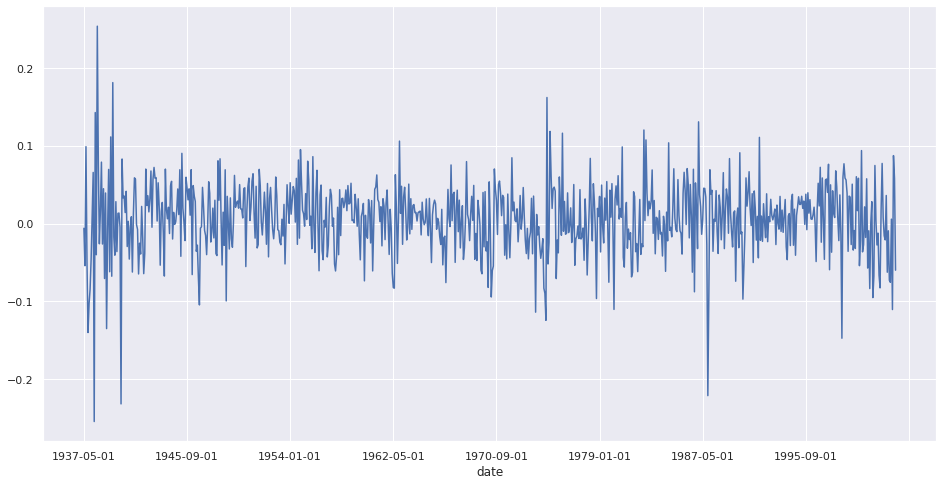

In [11]:
figsize = (16, 8)
train_df.set_index("date")["target"].plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [12]:
train_data = []

In [13]:
for value in train_df.values:
    train_data.append(list(value))

In [14]:
train_data[:2]

[['1937-05-01',
  -2.9994291354353173,
  -2.9994291354353173,
  -2.648946161744506,
  -0.3504829736908111,
  0.4893824051284986,
  0.0282780631029591,
  0.0040999999999999,
  0.0282,
  0.0053,
  0.0241,
  0.0150999999999999,
  -0.0013,
  -2.9994291354353173,
  -0.0060406666666666],
 ['1937-06-01',
  -2.908720896564361,
  -2.908720896564361,
  -2.5773637606099187,
  -0.3313571359544425,
  0.5049610205527995,
  0.0312661665365891,
  0.0036,
  0.0285,
  -0.0018,
  0.0249,
  0.0165,
  0.0071,
  -2.908720896564361,
  -0.054103]]

Custom Model Request (optional)

In [15]:
custom_model_request_dict = {
    'type': 'meta_wa',
    'score': ['smape', 'mape'],
    'param': {
        'base_models': [
            {'type': 'darts_autoarima'},
            {'type': 'darts_autotheta'},
            {'type': 'darts_autoets'},
            {'type': 'stats_autotheta'},
        ]
    }
}

In [16]:
custom_model_request = json.dumps(custom_model_request_dict)

Train API JSON Payload

In [17]:
api_json = {
    'data': train_data,
    # 'model': custom_model_request,  # TODO: custom_model_request_dict returns empty JSON output
}

Build URL

In [18]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [19]:
# URL to our SYBIL AWS service
protocol = url_dict["protocol"]
host = url_dict["host"]
port = url_dict["port"]
endpoint = "train"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [20]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: user 28.4 ms, sys: 0 ns, total: 28.4 ms
Wall time: 157 ms


/home/studio-lab-user/.conda/envs/dev/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sybil.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [21]:
response

<Response [500]>

In [22]:
train_json_out = response.json()  # dict output
# train_json_out = json.dumps(response.json())  # str output
# train_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
train_json_out

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [ ]:
dates = [
    "1961-01-01", "1961-02-01", "1961-03-01", "1961-04-01", "1961-05-01", "1961-06-01",
    "1961-07-01", "1961-08-01", "1961-09-01", "1961-10-01", "1961-11-01", "1961-12-01",
    "1962-01-01", "1962-02-01", "1962-03-01", "1962-04-01", "1962-05-01", "1962-06-01",
    "1962-07-01", "1962-08-01", "1962-09-01", "1962-10-01", "1962-11-01", "1962-12-01",
]

Model from Train API

In [ ]:
model = train_json_out["model"]

Forecast API JSON Payload

In [ ]:
api_json = {
    'model': model,
    'predicts': dates
}

Build URL (same as train except for the endpoint)

In [ ]:
endpoint = "forecast"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [ ]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

In [ ]:
forecast_json_out = response.json()  # dict output
# forecast_json_out = json.dumps(response.json())  # str output
# forecast_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [ ]:
forecast_json_out

Combine forecast dates and output

In [ ]:
forecast_data = list(zip(dates, forecast_json_out["data"]))
forecast_df = pd.DataFrame(forecast_data, columns = ["ds", "y"])

In [ ]:
forecast_df.shape

In [ ]:
forecast_df.columns

In [ ]:
forecast_df.head()

In [ ]:
forecast_df.tail()

Plot train and forecast side-by-side

In [ ]:
train_df["color"] = "b"
train_df.set_index("ds").plot(figsize=figsize, color=train_df["color"]);

In [ ]:
forecast_df["color"] = "r"
forecast_df.set_index("ds").plot(figsize=figsize, color=forecast_df["color"]);

Combine train and test sets

In [ ]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

Plot combined train and test sets with the vertical black line as the cut-off

In [ ]:
df.set_index("ds").plot(figsize=figsize, color=df["color"])
plt.axvline(x=len(train_df), color='black', label ='Train/Test set cut-off')
plt.show();